# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na √°rea de Marketing em entender as necessidades e demandas dos clientes de maneira f√°cil e r√°pida nas redes sociais. A solu√ß√£o proposta para esse problema foi o desenvolvimento de uma Intelig√™ncia Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solu√ß√£o √© rastrear os dados em tempo real, analisar e interpretar as mensagens e coment√°rios enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto est√° utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informa√ß√µes dispostas nesse dataset, realizaremos insights a cerca dos coment√°rios feitos nos posts do Instagram do pr√≥prio banco. Vale lembrar que os dados est√£o anonimizados e resguardados para manter a privacidade e √©tica com os usu√°rios e com o banco.

# 1. Instala√ß√£o / Setup

Para o in√≠cio do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma c√©lula de conex√£o com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisar√° do dataset baixado.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Aqui n√≥s fazemos as importa√ß√µes para tratamento dos dados, pr√©-processamento dos dados e modelamento do Bag of Words. 

## pips

In [2]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.6/6.6 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import nltk
import spacy
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

import pickle

# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conte√∫do:

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Projeto_Modulo6/nova_base_tratada2')
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     ['alvarez', 'marsal', 'estar', 'conosco', 'spo...  
1     ['btgpactual', 'with', 'make_repost', 'entenda...  
2                           ['minuto', 'touro', 'ouro']  
3         ['querer', 'saber', 'banking', 'administrar']  
4     ['in√≠cio', 'guerra', 'r√∫ssia', 'ucr√¢nia', 'vel...  
...                                                 ...  
8035                        ['excelente', 'explica√ß√£o']  
8036            ['atendar', 'telefone', 'amor', 'deus']  
8037  ['grande', 'fiis', 'mercado', 'n√£o', 'selecion...  
8038  ['erro', 'financeiro', 'eliminar', 'parar', 'o...  
8039  ['morning', 'call', 'n√£o', 'aparecer', 'spotif...  

[8040 rows x 3 columns]

In [9]:
df.columns

Index(['autor', 'sentimento', 'texto_tratado'], dtype='object')

In [12]:
df['texto_tratado']

0       ['alvarez', 'marsal', 'estar', 'conosco', 'spo...
1       ['btgpactual', 'with', 'make_repost', 'entenda...
2                             ['minuto', 'touro', 'ouro']
3           ['querer', 'saber', 'banking', 'administrar']
4       ['in√≠cio', 'guerra', 'r√∫ssia', 'ucr√¢nia', 'vel...
                              ...                        
8035                          ['excelente', 'explica√ß√£o']
8036              ['atendar', 'telefone', 'amor', 'deus']
8037    ['grande', 'fiis', 'mercado', 'n√£o', 'selecion...
8038    ['erro', 'financeiro', 'eliminar', 'parar', 'o...
8039    ['morning', 'call', 'n√£o', 'aparecer', 'spotif...
Name: texto_tratado, Length: 8040, dtype: object

In [13]:
# Supondo que seu DataFrame seja chamado de df e a coluna seja 'texto_tratado'
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...
                              ...                        
8035                              [excelente, explica√ß√£o]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, n√£o, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, n√£o, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

# 3. Bag of Words (BoW) - **CORRIGIR**

O modelo Bag of Words (BoW) √© uma t√©cnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra √∫nica do texto √© transformada em uma "feature" (caracter√≠stica), e a frequ√™ncia de cada palavra no texto √© usada como um valor num√©rico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequ√™ncia de cada palavra seria contada, e o resultado seria um vetor num√©rico que representa a frequ√™ncia de cada palavra na frase.


## 3.1 Teste isolado

In [14]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informa√ß√£o do Inteli", "O Renato √© o nosso orientador", "O Hayashi √© o nosso professor de programa√ß√£o"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informa√ß√£o', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programa√ß√£o', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words √© uma t√©cnica simples e eficiente para representar textos em formato vetorial, o que permite utiliz√°-los em algoritmos de aprendizado de m√°quina. 

No entanto, essa abordagem ignora informa√ß√µes importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as rela√ß√µes sint√°ticas entre elas. Por isso, √© comum utilizar t√©cnicas mais avan√ßadas, como a modelagem de t√≥picos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Por√©m, para vieses acad√™micos, estamos implementando e aprendendo como √© o funcionamento desse processo.

## 3.2 Defini√ß√£o da Fun√ß√£o


In [15]:
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, make_repost, entendar, impa...  
2                                 [minuto, touro, ouro]  
3                 [querer, saber, banking, administrar]  
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  
...                                                 ...  
8035                            [excelente, explica√ß√£o]  
8036                    [atendar, telefone, amor, deus]  
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  
8038  [erro, financeiro, eliminar, parar, ostentar, ...  
8039  [morning, call, n√£o, aparecer, spotify, atuali...  

[8040 rows x 3 columns]

In [16]:
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...
                              ...                        
8035                              [excelente, explica√ß√£o]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, n√£o, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, n√£o, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

In [17]:
def bow(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma √∫nica string
    frases_concatenadas = [''.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicion√°rio de palavras
    dicionario = vectorizer.vocabulary_

    bow_df = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())

    return bow_model, dicionario, bow_df

# Aplicar a fun√ß√£o de Bag of Words
bow_model, dicionario, bow_df = bow(df['texto_tratado'].tolist())

In [18]:
# Imprime o vocabul√°rio de palavras
print("Dicion√°rio de palavras:")
print(dicionario, "\n")

# Imprime a matriz Bag of Words
print("Representa√ß√£o Bag of Words:")
print(bow_model.toarray())

Dicion√°rio de palavras:
{'alvarez': 735, 'marsal': 10926, 'estar': 6432, 'conosco': 3932, 'sportainmet': 16172, 'labsr': 9961, 'evento': 6593, 'sportainment': 16171, 'am√©ricar': 863, 'latino': 10040, 'parceria': 12709, 'hubstage': 8552, 'bichar': 2086, 'motta': 11599, 'advogado': 368, 'win': 18071, 'the': 16750, 'game': 7726, 'participe': 12747, 'online': 12367, 'gratuito': 8108, 'mar√ßo': 10946, 'inscreva': 9110, 'link': 10302, 'bio': 2110, 'btgpactual': 2490, 'with': 18086, 'make_repost': 10701, 'entendar': 6104, 'impacto': 8765, 'conflito': 3884, 'r√∫ssia': 15320, 'ucr√¢nio': 17275, 'cen√°rio': 3097, 'global': 7949, 'live': 10334, 'in√©dito': 9383, 'amanh√£': 767, 'anatole': 894, 'kaletsky': 9837, 's√≥cio': 16470, 'fundador': 7607, 'economista': 5686, 'chefe': 3221, 'gavekal': 7786, 'research': 14845, 'jo√£o': 9729, 'scandiuzzi': 15526, 'estrategista': 6487, 'wealth': 18011, 'management': 10727, 'modera√ß√£o': 11462, 'daniel': 4624, 'cunha': 4499, 'vivo': 17878, 'canal': 2720, 'yo

---

In [19]:
bow_df

a_aphotographs  a_doce_casa  aa  aaa  aaaah  aaaahhh  aabb  aabbrio  \
0                  0            0   0    0      0        0     0        0   
1                  0            0   0    0      0        0     0        0   
2                  0            0   0    0      0        0     0        0   
3                  0            0   0    0      0        0     0        0   
4                  0            0   0    0      0        0     0        0   
...              ...          ...  ..  ...    ...      ...   ...      ...   
8035               0            0   0    0      0        0     0        0   
8036               0            0   0    0      0        0     0        0   
8037               0            0   0    0      0        0     0        0   
8038               0            0   0    0      0        0     0        0   
8039               0            0   0    0      0        0     0        0   

      aacdoficial  aai  ...  ùöúùöéùöõ  ùöúùöéùöûùöú  ùöúùöûùöä  ùöùùöé  ùöùùöûùöçùöò  ùöûùöñùöä  ùöüùöä  ùöüùöäùöí  ùöüùöäùöïùöòùöõùöéùöú  \
0               0    0  ...    0     0    0   0     0    0   0    0        0   
1               0    0  ...    0     0    0   0     0    0   0    0        0   
2               0    0  ...    0     0    0   0     0    0   0    0        0   
3               0    0  ...    0     0    0   0     0    0   0    0        0   
4               0    0  ...    0     0    0   0     0    0   0    0        0   
...           ...  ...  ...  ...   ...  ...  ..   ...  ...  ..  ...      ...   
8035            0    0  ...    0     0    0   0     0    0   0    0        0   
8036            0    0  ...    0     0    0   0     0    0   0    0        0   
8037            0    0  ...    0     0    0   0     0    0   0    0        0   
8038            0    0  ...    0     0    0   0     0    0   0    0        0   
8039            0    0  ...    0     0    0   0     0    0   0    0        0   

      ùöüùöòùöïùöäùöùùöíùöïùöíùöçùöäùöçùöé  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8035             0  
8036             0  
8037             0  
8038             0  
8039             0  

[8040 rows x 18459 columns]

In [20]:
# # Criando a fun√ß√£o de vetoriza√ß√£o, a qual ir√° criar um DataFrame com todos os termos e suas contabiliza√ß√µes em cada coment√°rio (representados pelo index)
# def bow(comentarios): 
#      # Inicializa o CountVectorizer
#     vectorizer = CountVectorizer(analyzer=lambda x: x)
#     # Cria o modelo Bag of Words
#     bow_model = vectorizer.fit_transform(comentarios)
#     # Dicion√°rio de palavras
#     dicionario = vectorizer.vocabulary_
#     # Cria um dataframe com as palavras e suas frequ√™ncias
#     bow_df = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())
#     return bow_df, dicionario

# bow_model, dicionario = bow(df['texto_tratado'])

In [21]:
# bow_model, dicionario

In [22]:
# # Imprime o vocabul√°rio de palavras
# print("Dicion√°rio de palavras:")
# print(dicionario, "\n")

---

# 10. Word2Vec com CBOW

## Estrutura√ß√£o

Nesse caso, o grupo utilizou um modelo j√° pr√© treinado, que est√° sendo referenciado abaixo.

In [23]:
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, make_repost, entendar, impa...  
2                                 [minuto, touro, ouro]  
3                 [querer, saber, banking, administrar]  
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  
...                                                 ...  
8035                            [excelente, explica√ß√£o]  
8036                    [atendar, telefone, amor, deus]  
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  
8038  [erro, financeiro, eliminar, parar, ostentar, ...  
8039  [morning, call, n√£o, aparecer, spotify, atuali...  

[8040 rows x 3 columns]

In [24]:
cbow = '/content/drive/MyDrive/Projeto_Modulo6/cbow_s50.txt'

In [25]:
model_cbow = KeyedVectors.load_word2vec_format(cbow)

## Teste isolado

Para testar se o modelo est√° funcionando, testamos com a palavra 'projeto'.

In [26]:
# Testando o word2vec
wordvec_test = model_cbow['projeto']

wordvec_test

array([-0.074174, -0.152088,  0.086627, -0.224567,  0.362562,  0.130683,
       -0.089179, -0.086973,  0.309501,  0.004112, -0.308202,  0.351789,
       -0.477863,  0.050276,  0.213283,  0.159895, -0.285545, -0.08832 ,
       -0.015449,  0.014816, -0.613861,  0.502556,  0.021688,  0.369492,
        0.280691,  0.016868,  0.105584, -0.180754, -0.078456,  0.148032,
        0.36293 , -0.011634,  0.412191, -0.009049,  0.010404,  0.131242,
       -0.032483, -0.133067, -0.063802,  0.434015, -0.214768, -0.072132,
        0.045601, -0.368866,  0.502808,  0.048293, -0.254894,  0.142581,
       -0.075066,  0.015646], dtype=float32)

## Defini√ß√£o de fun√ß√£o

A fun√ß√£o abaixo define uma fun√ß√£o chamada "create_sentence_vector" que tem como objetivo criar um vetor de representa√ß√£o para cada senten√ßa do DataFrame fornecido. 

In [27]:
def create_sentence_vector(model, df):
    sentence_table = []
    for sentence in df['texto_tratado']:
        word_vectors = [model[word] for word in sentence if word in model]
        if len(word_vectors) > 0:
            sentence_vector = sum(word_vectors) / len(word_vectors)
        else:
            sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
        sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

    column_labels = ['Frase']
    for i in range(50):
        column_labels.append(f'Vetor{i+1}')
    df_vec = pd.DataFrame(sentence_table, columns=column_labels)

    df["sentimentoNumerico"] = df["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})

    # Definir o √≠ndice do DataFrame df_vec como o mesmo √≠ndice de df_processada['sentimentoNumerico']
    df_vec.set_index(df["sentimentoNumerico"].index, inplace=True)

    df_vec['sentimento'] = df["sentimentoNumerico"]
    df_vec = df_vec.dropna()

    return df_vec

## Teste de fun√ß√µes

Abaixo, a fun√ß√£o definida acima √© testada no dataframe inteiro, que cria 50 colunas (vetores) e a √∫ltima coluna √© o sentimento gerado naquela frase, que j√° est√° tratado.

In [28]:
df_vec = create_sentence_vector(model_cbow, df)
df_vec

Frase    Vetor1    Vetor2  \
0     [alvarez, marsal, estar, conosco, sportainmet,...  0.214823 -0.123036   
1     [btgpactual, with, make_repost, entendar, impa...  0.220860 -0.123713   
2                                 [minuto, touro, ouro]  0.265227 -0.068285   
3                 [querer, saber, banking, administrar]  0.189241 -0.169407   
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  0.219838 -0.138311   
...                                                 ...       ...       ...   
8035                            [excelente, explica√ß√£o]  0.190917 -0.133475   
8036                    [atendar, telefone, amor, deus]  0.188641 -0.119377   
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  0.219437 -0.141124   
8038  [erro, financeiro, eliminar, parar, ostentar, ...  0.218153 -0.146420   
8039  [morning, call, n√£o, aparecer, spotify, atuali...  0.224609 -0.139236   

        Vetor3    Vetor4    Vetor5    Vetor6    Vetor7    Vetor8    Vetor9  \
0     0.220707 -0.079739 -0.019442  0.202300  0.073742  0.042477  0.057268   
1     0.205813 -0.063700 -0.010433  0.195687  0.072226  0.026175  0.058045   
2     0.152235 -0.044329 -0.102729  0.141353  0.092800  0.113174  0.015783   
3     0.281181 -0.093912 -0.001968  0.181633  0.080923  0.055674  0.103454   
4     0.229412 -0.057420 -0.014510  0.212875  0.058865  0.068096  0.060398   
...        ...       ...       ...       ...       ...       ...       ...   
8035  0.241675 -0.053180  0.067256  0.201138  0.034109 -0.078718 -0.066131   
8036  0.199339 -0.105448  0.023176  0.178837  0.069476 -0.004494  0.034710   
8037  0.217854 -0.065569 -0.020409  0.205403  0.061334  0.041665  0.063050   
8038  0.245234 -0.056113 -0.036187  0.224789  0.074320  0.045111  0.040841   
8039  0.277561 -0.049273  0.007569  0.250299  0.055606  0.060699  0.050552   

      ...   Vetor42   Vetor43   Vetor44   Vetor45   Vetor46   Vetor47  \
0     ...  0.012086 -0.096122  0.148153  0.092629 -0.027504  0.149860   
1     ...  0.006447 -0.076174  0.157446  0.085306 -0.001963  0.156306   
2     ...  0.078032 -0.202677  0.155750  0.062291  0.007038  0.134573   
3     ...  0.092738 -0.160601  0.179499  0.091803 -0.063762  0.171190   
4     ...  0.040836 -0.112662  0.170401  0.094290 -0.046000  0.168181   
...   ...       ...       ...       ...       ...       ...       ...   
8035  ... -0.082151  0.016113  0.154861  0.068700 -0.004302  0.079717   
8036  ...  0.034035 -0.126673  0.165176  0.080313 -0.024160  0.118848   
8037  ...  0.031438 -0.099000  0.176588  0.092546 -0.046104  0.145734   
8038  ...  0.035260 -0.126793  0.171115  0.095479 -0.033473  0.158747   
8039  ...  0.006490 -0.105791  0.168540  0.102157 -0.018187  0.139210   

       Vetor48   Vetor49   Vetor50  sentimento  
0    -0.029617  0.032065  0.190372           1  
1    -0.019182  0.035594  0.192635           1  
2     0.014635  0.034189  0.345674           2  
3    -0.043618  0.030563  0.196250           2  
4    -0.018029  0.027667  0.180134           0  
...        ...       ...       ...         ...  
8035 -0.028388 -0.017448  0.188785           2  
8036 -0.003502  0.087053  0.215656           2  
8037 -0.019857  0.029422  0.183504           2  
8038 -0.006721  0.029326  0.198914           1  
8039 -0.017767  0.033116  0.184341           0  

[8040 rows x 52 columns]

In [29]:
#df_vec.to_csv('Word2Vec_Cbow_modelo_treinado',encoding='utf-8', index=False, header=True)

# 11. Naive Bayes + Word2Vec com CBOW

O Naive Bayes √© um algoritmo utilizado para classifica√ß√£o de textos com base em representa√ß√µes vetoriais. O Word2Vec com CBoW √© um algoritmo de aprendizado de representa√ß√µes vetoriais. 

Nesse t√≥pico vamos juntar os dois para classificar os textos.

In [30]:
label = preprocessing.LabelEncoder()

In [31]:
label.fit(df_vec['sentimento'])
df_vec['sentimento'] = label.transform(df_vec['sentimento'])

In [32]:
df_vec = df_vec.dropna()
df_vec

Frase    Vetor1    Vetor2  \
0     [alvarez, marsal, estar, conosco, sportainmet,...  0.214823 -0.123036   
1     [btgpactual, with, make_repost, entendar, impa...  0.220860 -0.123713   
2                                 [minuto, touro, ouro]  0.265227 -0.068285   
3                 [querer, saber, banking, administrar]  0.189241 -0.169407   
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  0.219838 -0.138311   
...                                                 ...       ...       ...   
8035                            [excelente, explica√ß√£o]  0.190917 -0.133475   
8036                    [atendar, telefone, amor, deus]  0.188641 -0.119377   
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  0.219437 -0.141124   
8038  [erro, financeiro, eliminar, parar, ostentar, ...  0.218153 -0.146420   
8039  [morning, call, n√£o, aparecer, spotify, atuali...  0.224609 -0.139236   

        Vetor3    Vetor4    Vetor5    Vetor6    Vetor7    Vetor8    Vetor9  \
0     0.220707 -0.079739 -0.019442  0.202300  0.073742  0.042477  0.057268   
1     0.205813 -0.063700 -0.010433  0.195687  0.072226  0.026175  0.058045   
2     0.152235 -0.044329 -0.102729  0.141353  0.092800  0.113174  0.015783   
3     0.281181 -0.093912 -0.001968  0.181633  0.080923  0.055674  0.103454   
4     0.229412 -0.057420 -0.014510  0.212875  0.058865  0.068096  0.060398   
...        ...       ...       ...       ...       ...       ...       ...   
8035  0.241675 -0.053180  0.067256  0.201138  0.034109 -0.078718 -0.066131   
8036  0.199339 -0.105448  0.023176  0.178837  0.069476 -0.004494  0.034710   
8037  0.217854 -0.065569 -0.020409  0.205403  0.061334  0.041665  0.063050   
8038  0.245234 -0.056113 -0.036187  0.224789  0.074320  0.045111  0.040841   
8039  0.277561 -0.049273  0.007569  0.250299  0.055606  0.060699  0.050552   

      ...   Vetor42   Vetor43   Vetor44   Vetor45   Vetor46   Vetor47  \
0     ...  0.012086 -0.096122  0.148153  0.092629 -0.027504  0.149860   
1     ...  0.006447 -0.076174  0.157446  0.085306 -0.001963  0.156306   
2     ...  0.078032 -0.202677  0.155750  0.062291  0.007038  0.134573   
3     ...  0.092738 -0.160601  0.179499  0.091803 -0.063762  0.171190   
4     ...  0.040836 -0.112662  0.170401  0.094290 -0.046000  0.168181   
...   ...       ...       ...       ...       ...       ...       ...   
8035  ... -0.082151  0.016113  0.154861  0.068700 -0.004302  0.079717   
8036  ...  0.034035 -0.126673  0.165176  0.080313 -0.024160  0.118848   
8037  ...  0.031438 -0.099000  0.176588  0.092546 -0.046104  0.145734   
8038  ...  0.035260 -0.126793  0.171115  0.095479 -0.033473  0.158747   
8039  ...  0.006490 -0.105791  0.168540  0.102157 -0.018187  0.139210   

       Vetor48   Vetor49   Vetor50  sentimento  
0    -0.029617  0.032065  0.190372           1  
1    -0.019182  0.035594  0.192635           1  
2     0.014635  0.034189  0.345674           2  
3    -0.043618  0.030563  0.196250           2  
4    -0.018029  0.027667  0.180134           0  
...        ...       ...       ...         ...  
8035 -0.028388 -0.017448  0.188785           2  
8036 -0.003502  0.087053  0.215656           2  
8037 -0.019857  0.029422  0.183504           2  
8038 -0.006721  0.029326  0.198914           1  
8039 -0.017767  0.033116  0.184341           0  

[8040 rows x 52 columns]

## Separando Treino e Teste

√â necess√°rio separar quais s√£o as frases de teste e de treino, processo realizado abaixo.

In [33]:
target = df_vec['sentimento']

In [34]:
feature = df_vec.iloc[:,1:50]

In [35]:
feature

Vetor1    Vetor2    Vetor3    Vetor4    Vetor5    Vetor6    Vetor7  \
0     0.214823 -0.123036  0.220707 -0.079739 -0.019442  0.202300  0.073742   
1     0.220860 -0.123713  0.205813 -0.063700 -0.010433  0.195687  0.072226   
2     0.265227 -0.068285  0.152235 -0.044329 -0.102729  0.141353  0.092800   
3     0.189241 -0.169407  0.281181 -0.093912 -0.001968  0.181633  0.080923   
4     0.219838 -0.138311  0.229412 -0.057420 -0.014510  0.212875  0.058865   
...        ...       ...       ...       ...       ...       ...       ...   
8035  0.190917 -0.133475  0.241675 -0.053180  0.067256  0.201138  0.034109   
8036  0.188641 -0.119377  0.199339 -0.105448  0.023176  0.178837  0.069476   
8037  0.219437 -0.141124  0.217854 -0.065569 -0.020409  0.205403  0.061334   
8038  0.218153 -0.146420  0.245234 -0.056113 -0.036187  0.224789  0.074320   
8039  0.224609 -0.139236  0.277561 -0.049273  0.007569  0.250299  0.055606   

        Vetor8    Vetor9   Vetor10  ...   Vetor40   Vetor41   Vetor42  \
0     0.042477  0.057268  0.168187  ...  0.076954 -0.281536  0.012086   
1     0.026175  0.058045  0.163238  ...  0.086821 -0.305640  0.006447   
2     0.113174  0.015783  0.202198  ... -0.008447 -0.193025  0.078032   
3     0.055674  0.103454  0.144342  ...  0.060960 -0.254610  0.092738   
4     0.068096  0.060398  0.156307  ...  0.067551 -0.269136  0.040836   
...        ...       ...       ...  ...       ...       ...       ...   
8035 -0.078718 -0.066131  0.187608  ...  0.014565 -0.321192 -0.082151   
8036 -0.004494  0.034710  0.150081  ...  0.071114 -0.194663  0.034035   
8037  0.041665  0.063050  0.167985  ...  0.077558 -0.300234  0.031438   
8038  0.045111  0.040841  0.150971  ...  0.060317 -0.270532  0.035260   
8039  0.060699  0.050552  0.117889  ...  0.084784 -0.245831  0.006490   

       Vetor43   Vetor44   Vetor45   Vetor46   Vetor47   Vetor48   Vetor49  
0    -0.096122  0.148153  0.092629 -0.027504  0.149860 -0.029617  0.032065  
1    -0.076174  0.157446  0.085306 -0.001963  0.156306 -0.019182  0.035594  
2    -0.202677  0.155750  0.062291  0.007038  0.134573  0.014635  0.034189  
3    -0.160601  0.179499  0.091803 -0.063762  0.171190 -0.043618  0.030563  
4    -0.112662  0.170401  0.094290 -0.046000  0.168181 -0.018029  0.027667  
...        ...       ...       ...       ...       ...       ...       ...  
8035  0.016113  0.154861  0.068700 -0.004302  0.079717 -0.028388 -0.017448  
8036 -0.126673  0.165176  0.080313 -0.024160  0.118848 -0.003502  0.087053  
8037 -0.099000  0.176588  0.092546 -0.046104  0.145734 -0.019857  0.029422  
8038 -0.126793  0.171115  0.095479 -0.033473  0.158747 -0.006721  0.029326  
8039 -0.105791  0.168540  0.102157 -0.018187  0.139210 -0.017767  0.033116  

[8040 rows x 49 columns]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avalia√ß√£o do modelo 

Abaixo √© calculado a acur√°cia, m√©dia macro e m√©dia ponderada do modelo.

In [ ]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

In [38]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precis√£o final de :",format_output) 

Precis√£o final de : 31.47%


# 12. Word2Vec com embedding layer

## Defini√ß√£o de fun√ß√£o

A fun√ß√£o abaixo utiliza a biblioteca Gensim para treinar o Word2Vec, que recebe a coluna do dataframe.

In [39]:
from gensim.models import Word2Vec

# Fun√ß√£o que treina o modelo Word2Vec no corpus do dataframe
def train_word2vec(df, column_name):
    # Obt√©m as frases tokenizadas
    sentences = df[column_name].tolist()
    
    # Treina o modelo Word2Vec
    model = Word2Vec(sentences, min_count=1)
    
    return model

A primeira fun√ß√£o recebe o Word2Vec j√° treinado e itera as palavras (input) da lista para verificar se est√° presente no modelo.

A segunda fun√ß√£o cria um novo dataframe com o modelo Word2Vec.

In [40]:
# Fun√ß√£o que define os vetores para cada palavra do vocabulario
def get_word_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word]) # Append na lista de vetores
    if vectors:
        return np.sum(vectors, axis=0)/len(sentence) # Soma dos vetores para cada frase
    else:
        return np.zeros(model.vector_size)

# Cria√ß√£o do dataframe de vetores para cada frase
def create_word2vec_dataframe(df, column_name, model):
    sentences = df[column_name].tolist()
    vectors = [get_word_vectors(model, sentence) for sentence in sentences] # Itera para cada frase um vetor
    # Cria√ß√£o do dataframe
    df_vectors = pd.DataFrame(vectors, columns=[f"Vetor{i}" for i in range(model.vector_size)])
    df_word2vec = pd.concat([df, df_vectors], axis=1)
    return df_word2vec

## Teste de fun√ß√µes

Abaixo s√£o testados as fun√ß√µes que foram criadas acima.

In [41]:
model = train_word2vec(df, 'texto_tratado')

In [42]:
df_word2vec = create_word2vec_dataframe(df,'texto_tratado', model)
df_word2vec

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  sentimentoNumerico  \
0     [alvarez, marsal, estar, conosco, sportainmet,...                   1   
1     [btgpactual, with, make_repost, entendar, impa...                   1   
2                                 [minuto, touro, ouro]                   2   
3                 [querer, saber, banking, administrar]                   2   
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...                   0   
...                                                 ...                 ...   
8035                            [excelente, explica√ß√£o]                   2   
8036                    [atendar, telefone, amor, deus]                   2   
8037  [grande, fiis, mercado, n√£o, selecionar, princ...                   2   
8038  [erro, financeiro, eliminar, parar, ostentar, ...                   1   
8039  [morning, call, n√£o, aparecer, spotify, atuali...                   0   

        Vetor0    Vetor1    Vetor2    Vetor3    Vetor4    Vetor5  ...  \
0    -0.040596  0.201057 -0.587482 -0.461829  0.090562  0.185413  ...   
1    -0.052535  0.204952 -0.554421 -0.419977  0.079677  0.176239  ...   
2    -0.137447  0.166970 -0.615913 -0.427152 -0.087120  0.212885  ...   
3    -0.043030  0.167756 -0.533593 -0.422472  0.144987  0.115414  ...   
4    -0.075185  0.243127 -0.590974 -0.436435  0.058026  0.187044  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8035 -0.146040  0.258804 -0.466082 -0.452530  0.070121  0.137384  ...   
8036 -0.094132  0.271853 -0.608205 -0.468443  0.084511  0.179713  ...   
8037 -0.058298  0.248697 -0.580123 -0.434655  0.027439  0.206130  ...   
8038 -0.074940  0.267129 -0.619967 -0.453707  0.054354  0.226676  ...   
8039 -0.108769  0.245312 -0.610336 -0.419929  0.110465  0.191524  ...   

       Vetor90   Vetor91   Vetor92   Vetor93   Vetor94   Vetor95   Vetor96  \
0    -0.070598  0.085019  0.106268  0.070255  0.072888  0.196763 -0.110067   
1    -0.054085  0.078274  0.099261  0.043703  0.062975  0.207802 -0.127206   
2    -0.153962  0.138240 -0.055025  0.041938  0.037115  0.260403  0.014757   
3    -0.065003  0.020102  0.159093 -0.015751  0.092890  0.278625 -0.030780   
4    -0.045425  0.066263  0.105139  0.042431  0.047273  0.185428 -0.138649   
...        ...       ...       ...       ...       ...       ...       ...   
8035  0.149279  0.030351  0.110613 -0.017123 -0.041833  0.151780 -0.060871   
8036 -0.006844  0.078776  0.108811 -0.019303 -0.003754  0.211196 -0.134939   
8037 -0.024670  0.073256  0.073779  0.058785  0.009258  0.158732 -0.173623   
8038 -0.052946  0.078625  0.086394  0.056885  0.030777  0.179850 -0.137322   
8039 -0.042615  0.036033  0.136418  0.010469  0.052468  0.246787 -0.102503   

       Vetor97   Vetor98   Vetor99  
0    -0.283604  0.448293 -0.081263  
1    -0.247713  0.414140 -0.060320  
2    -0.360261  0.534301 -0.110851  
3    -0.301135  0.446972 -0.077218  
4    -0.274532  0.446329 -0.051511  
...        ...       ...       ...  
8035 -0.231545  0.386411 -0.070098  
8036 -0.281820  0.467868 -0.083125  
8037 -0.252529  0.434525 -0.018273  
8038 -0.255487  0.465313 -0.038463  
8039 -0.274153  0.471797 -0.060545  

[8040 rows x 104 columns]

In [43]:
df_word2vec = df_word2vec.drop(columns=['autor', 'sentimento'])
df_word2vec

texto_tratado  sentimentoNumerico  \
0     [alvarez, marsal, estar, conosco, sportainmet,...                   1   
1     [btgpactual, with, make_repost, entendar, impa...                   1   
2                                 [minuto, touro, ouro]                   2   
3                 [querer, saber, banking, administrar]                   2   
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...                   0   
...                                                 ...                 ...   
8035                            [excelente, explica√ß√£o]                   2   
8036                    [atendar, telefone, amor, deus]                   2   
8037  [grande, fiis, mercado, n√£o, selecionar, princ...                   2   
8038  [erro, financeiro, eliminar, parar, ostentar, ...                   1   
8039  [morning, call, n√£o, aparecer, spotify, atuali...                   0   

        Vetor0    Vetor1    Vetor2    Vetor3    Vetor4    Vetor5    Vetor6  \
0    -0.040596  0.201057 -0.587482 -0.461829  0.090562  0.185413 -0.285650   
1    -0.052535  0.204952 -0.554421 -0.419977  0.079677  0.176239 -0.288785   
2    -0.137447  0.166970 -0.615913 -0.427152 -0.087120  0.212885 -0.254145   
3    -0.043030  0.167756 -0.533593 -0.422472  0.144987  0.115414 -0.262763   
4    -0.075185  0.243127 -0.590974 -0.436435  0.058026  0.187044 -0.280026   
...        ...       ...       ...       ...       ...       ...       ...   
8035 -0.146040  0.258804 -0.466082 -0.452530  0.070121  0.137384 -0.210961   
8036 -0.094132  0.271853 -0.608205 -0.468443  0.084511  0.179713 -0.285182   
8037 -0.058298  0.248697 -0.580123 -0.434655  0.027439  0.206130 -0.289194   
8038 -0.074940  0.267129 -0.619967 -0.453707  0.054354  0.226676 -0.277436   
8039 -0.108769  0.245312 -0.610336 -0.419929  0.110465  0.191524 -0.295578   

        Vetor7  ...   Vetor90   Vetor91   Vetor92   Vetor93   Vetor94  \
0    -0.056377  ... -0.070598  0.085019  0.106268  0.070255  0.072888   
1    -0.054338  ... -0.054085  0.078274  0.099261  0.043703  0.062975   
2    -0.028276  ... -0.153962  0.138240 -0.055025  0.041938  0.037115   
3     0.005590  ... -0.065003  0.020102  0.159093 -0.015751  0.092890   
4    -0.081321  ... -0.045425  0.066263  0.105139  0.042431  0.047273   
...        ...  ...       ...       ...       ...       ...       ...   
8035 -0.164016  ...  0.149279  0.030351  0.110613 -0.017123 -0.041833   
8036 -0.073410  ... -0.006844  0.078776  0.108811 -0.019303 -0.003754   
8037 -0.108199  ... -0.024670  0.073256  0.073779  0.058785  0.009258   
8038 -0.100812  ... -0.052946  0.078625  0.086394  0.056885  0.030777   
8039 -0.041024  ... -0.042615  0.036033  0.136418  0.010469  0.052468   

       Vetor95   Vetor96   Vetor97   Vetor98   Vetor99  
0     0.196763 -0.110067 -0.283604  0.448293 -0.081263  
1     0.207802 -0.127206 -0.247713  0.414140 -0.060320  
2     0.260403  0.014757 -0.360261  0.534301 -0.110851  
3     0.278625 -0.030780 -0.301135  0.446972 -0.077218  
4     0.185428 -0.138649 -0.274532  0.446329 -0.051511  
...        ...       ...       ...       ...       ...  
8035  0.151780 -0.060871 -0.231545  0.386411 -0.070098  
8036  0.211196 -0.134939 -0.281820  0.467868 -0.083125  
8037  0.158732 -0.173623 -0.252529  0.434525 -0.018273  
8038  0.179850 -0.137322 -0.255487  0.465313 -0.038463  
8039  0.246787 -0.102503 -0.274153  0.471797 -0.060545  

[8040 rows x 102 columns]

# 13. Naive Bayes + Word2Vec com embedding layer

Essa abordagem √© utilizada para realizar classifica√ß√£o de texto com base no Word2Vec.

In [44]:
df_word2vec = df_word2vec.dropna()
df_word2vec

texto_tratado  sentimentoNumerico  \
0     [alvarez, marsal, estar, conosco, sportainmet,...                   1   
1     [btgpactual, with, make_repost, entendar, impa...                   1   
2                                 [minuto, touro, ouro]                   2   
3                 [querer, saber, banking, administrar]                   2   
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...                   0   
...                                                 ...                 ...   
8035                            [excelente, explica√ß√£o]                   2   
8036                    [atendar, telefone, amor, deus]                   2   
8037  [grande, fiis, mercado, n√£o, selecionar, princ...                   2   
8038  [erro, financeiro, eliminar, parar, ostentar, ...                   1   
8039  [morning, call, n√£o, aparecer, spotify, atuali...                   0   

        Vetor0    Vetor1    Vetor2    Vetor3    Vetor4    Vetor5    Vetor6  \
0    -0.040596  0.201057 -0.587482 -0.461829  0.090562  0.185413 -0.285650   
1    -0.052535  0.204952 -0.554421 -0.419977  0.079677  0.176239 -0.288785   
2    -0.137447  0.166970 -0.615913 -0.427152 -0.087120  0.212885 -0.254145   
3    -0.043030  0.167756 -0.533593 -0.422472  0.144987  0.115414 -0.262763   
4    -0.075185  0.243127 -0.590974 -0.436435  0.058026  0.187044 -0.280026   
...        ...       ...       ...       ...       ...       ...       ...   
8035 -0.146040  0.258804 -0.466082 -0.452530  0.070121  0.137384 -0.210961   
8036 -0.094132  0.271853 -0.608205 -0.468443  0.084511  0.179713 -0.285182   
8037 -0.058298  0.248697 -0.580123 -0.434655  0.027439  0.206130 -0.289194   
8038 -0.074940  0.267129 -0.619967 -0.453707  0.054354  0.226676 -0.277436   
8039 -0.108769  0.245312 -0.610336 -0.419929  0.110465  0.191524 -0.295578   

        Vetor7  ...   Vetor90   Vetor91   Vetor92   Vetor93   Vetor94  \
0    -0.056377  ... -0.070598  0.085019  0.106268  0.070255  0.072888   
1    -0.054338  ... -0.054085  0.078274  0.099261  0.043703  0.062975   
2    -0.028276  ... -0.153962  0.138240 -0.055025  0.041938  0.037115   
3     0.005590  ... -0.065003  0.020102  0.159093 -0.015751  0.092890   
4    -0.081321  ... -0.045425  0.066263  0.105139  0.042431  0.047273   
...        ...  ...       ...       ...       ...       ...       ...   
8035 -0.164016  ...  0.149279  0.030351  0.110613 -0.017123 -0.041833   
8036 -0.073410  ... -0.006844  0.078776  0.108811 -0.019303 -0.003754   
8037 -0.108199  ... -0.024670  0.073256  0.073779  0.058785  0.009258   
8038 -0.100812  ... -0.052946  0.078625  0.086394  0.056885  0.030777   
8039 -0.041024  ... -0.042615  0.036033  0.136418  0.010469  0.052468   

       Vetor95   Vetor96   Vetor97   Vetor98   Vetor99  
0     0.196763 -0.110067 -0.283604  0.448293 -0.081263  
1     0.207802 -0.127206 -0.247713  0.414140 -0.060320  
2     0.260403  0.014757 -0.360261  0.534301 -0.110851  
3     0.278625 -0.030780 -0.301135  0.446972 -0.077218  
4     0.185428 -0.138649 -0.274532  0.446329 -0.051511  
...        ...       ...       ...       ...       ...  
8035  0.151780 -0.060871 -0.231545  0.386411 -0.070098  
8036  0.211196 -0.134939 -0.281820  0.467868 -0.083125  
8037  0.158732 -0.173623 -0.252529  0.434525 -0.018273  
8038  0.179850 -0.137322 -0.255487  0.465313 -0.038463  
8039  0.246787 -0.102503 -0.274153  0.471797 -0.060545  

[8040 rows x 102 columns]

## Separando Treino e Teste

√â necess√°rio separar quais s√£o as frases de teste e de treino, processo realizado abaixo.

In [45]:
target = df_word2vec['sentimentoNumerico']

In [46]:
feature = df_word2vec.iloc[:,2:102]

In [47]:
feature

Vetor0    Vetor1    Vetor2    Vetor3    Vetor4    Vetor5    Vetor6  \
0    -0.040596  0.201057 -0.587482 -0.461829  0.090562  0.185413 -0.285650   
1    -0.052535  0.204952 -0.554421 -0.419977  0.079677  0.176239 -0.288785   
2    -0.137447  0.166970 -0.615913 -0.427152 -0.087120  0.212885 -0.254145   
3    -0.043030  0.167756 -0.533593 -0.422472  0.144987  0.115414 -0.262763   
4    -0.075185  0.243127 -0.590974 -0.436435  0.058026  0.187044 -0.280026   
...        ...       ...       ...       ...       ...       ...       ...   
8035 -0.146040  0.258804 -0.466082 -0.452530  0.070121  0.137384 -0.210961   
8036 -0.094132  0.271853 -0.608205 -0.468443  0.084511  0.179713 -0.285182   
8037 -0.058298  0.248697 -0.580123 -0.434655  0.027439  0.206130 -0.289194   
8038 -0.074940  0.267129 -0.619967 -0.453707  0.054354  0.226676 -0.277436   
8039 -0.108769  0.245312 -0.610336 -0.419929  0.110465  0.191524 -0.295578   

        Vetor7    Vetor8    Vetor9  ...   Vetor90   Vetor91   Vetor92  \
0    -0.056377 -0.266628  0.280612  ... -0.070598  0.085019  0.106268   
1    -0.054338 -0.264791  0.289984  ... -0.054085  0.078274  0.099261   
2    -0.028276 -0.337552  0.343505  ... -0.153962  0.138240 -0.055025   
3     0.005590 -0.289275  0.297701  ... -0.065003  0.020102  0.159093   
4    -0.081321 -0.276257  0.323447  ... -0.045425  0.066263  0.105139   
...        ...       ...       ...  ...       ...       ...       ...   
8035 -0.164016 -0.293466  0.261879  ...  0.149279  0.030351  0.110613   
8036 -0.073410 -0.298110  0.362134  ... -0.006844  0.078776  0.108811   
8037 -0.108199 -0.267776  0.323017  ... -0.024670  0.073256  0.073779   
8038 -0.100812 -0.274228  0.342775  ... -0.052946  0.078625  0.086394   
8039 -0.041024 -0.321876  0.377380  ... -0.042615  0.036033  0.136418   

       Vetor93   Vetor94   Vetor95   Vetor96   Vetor97   Vetor98   Vetor99  
0     0.070255  0.072888  0.196763 -0.110067 -0.283604  0.448293 -0.081263  
1     0.043703  0.062975  0.207802 -0.127206 -0.247713  0.414140 -0.060320  
2     0.041938  0.037115  0.260403  0.014757 -0.360261  0.534301 -0.110851  
3    -0.015751  0.092890  0.278625 -0.030780 -0.301135  0.446972 -0.077218  
4     0.042431  0.047273  0.185428 -0.138649 -0.274532  0.446329 -0.051511  
...        ...       ...       ...       ...       ...       ...       ...  
8035 -0.017123 -0.041833  0.151780 -0.060871 -0.231545  0.386411 -0.070098  
8036 -0.019303 -0.003754  0.211196 -0.134939 -0.281820  0.467868 -0.083125  
8037  0.058785  0.009258  0.158732 -0.173623 -0.252529  0.434525 -0.018273  
8038  0.056885  0.030777  0.179850 -0.137322 -0.255487  0.465313 -0.038463  
8039  0.010469  0.052468  0.246787 -0.102503 -0.274153  0.471797 -0.060545  

[8040 rows x 100 columns]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avalia√ß√£o do modelo 

Abaixo √© calculado a acur√°cia, m√©dia macro e m√©dia ponderada do modelo.

In [49]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.25      0.78      0.37       360
           1       0.58      0.27      0.37       597
           2       0.43      0.13      0.20       651

    accuracy                           0.33      1608
   macro avg       0.42      0.39      0.31      1608
weighted avg       0.45      0.33      0.30      1608



In [50]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precis√£o final de :",format_output) 

Precis√£o final de : 32.71%


# Modelo Rede Neural sem embedding

### Defini√ß√£o do modelo
O modelo possui tr√™s camadas: uma camada de entrada com 100 neur√¥nios, uma camada oculta com 32 neur√¥nios e uma camada de sa√≠da com 3 neur√¥nios para classifica√ß√£o nas categorias NEGATIVE, NEUTRAL e POSITIVE.

In [67]:
# Criando o modelo da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(100,)))  # Camada de entrada com 100 neur√¥nios
model.add(Dense(32, activation='relu'))  # Camada oculta com 32 neur√¥nios
model.add(Dense(3, activation='softmax'))  # Camada de sa√≠da com 3 neur√¥nios para classifica√ß√£o (NEGATIVE, NEUTRAL, POSITIVE)

### Compila√ß√£o do modelo
Configura-se o otimizador como 'adam', que √© um m√©todo de otimiza√ß√£o popular, e a fun√ß√£o de perda como 'sparse_categorical_crossentropy', que √© apropriada para problemas de classifica√ß√£o com v√°rias categorias.

In [68]:
# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Treinamento do modelo
O modelo √© treinado utilizando o conjunto de treinamento (X_train e y_train). O treinamento ocorre durante 70 √©pocas e a valida√ß√£o dos dados de teste √© feita utilizando o conjunto de teste (X_test e y_test).

In [74]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
201/201 [==============================] - 1s 4ms/step - loss: 0.8751 - accuracy: 0.5804 - val_loss: 0.9567 - val_accuracy: 0.5466
Epoch 2/60
201/201 [==============================] - 1s 7ms/step - loss: 0.8776 - accuracy: 0.5766 - val_loss: 0.9600 - val_accuracy: 0.5510
Epoch 3/60
201/201 [==============================] - 1s 3ms/step - loss: 0.8739 - accuracy: 0.5808 - val_loss: 0.9498 - val_accuracy: 0.5603
Epoch 4/60
201/201 [==============================] - 0s 2ms/step - loss: 0.8748 - accuracy: 0.5826 - val_loss: 0.9386 - val_accuracy: 0.5547
Epoch 5/60
201/201 [==============================] - 0s 2ms/step - loss: 0.8767 - accuracy: 0.5779 - val_loss: 0.9373 - val_accuracy: 0.5616
Epoch 6/60
201/201 [==============================] - 1s 3ms/step - loss: 0.8706 - accuracy: 0.5858 - val_loss: 0.9459 - val_accuracy: 0.5479
Epoch 7/60
201/201 [==============================] - 1s 3ms/step - loss: 0.8666 - accuracy: 0.5812 - val_loss: 0.9528 - val_accuracy: 0.5603
Epoch 

### Avalia√ß√£o do modelo
A fun√ß√£o evaluate √© usada para calcular a perda (loss) e a acur√°cia (accuracy) do modelo nos dados de teste, e em seguida esses valores s√£o exibidos.

In [75]:
# Avalia√ß√£o do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

51/51 [==============================] - 0s 1ms/step - loss: 0.9738 - accuracy: 0.5317
Loss: 0.9738093018531799
Accuracy: 0.5317164063453674


### Previs√µes do modelo
Essa c√©lula faz previs√µes usando o modelo treinado com o conjunto de teste (X_test). <br>
Depois, gera-se um relat√≥rio de classifica√ß√£o usando a fun√ß√£o classification_report do scikit-learn, comparando as classes verdadeiras (y_test) com as classes preditas (y_pred_classes). <br>

In [76]:
# Previs√µes do modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred_classes)

# Imprimir a tabela de classifica√ß√£o
print(report)

51/51 [==============================] - 0s 992us/step
              precision    recall  f1-score   support

           0       0.40      0.62      0.49       360
           1       0.62      0.47      0.54       597
           2       0.58      0.54      0.56       651

    accuracy                           0.53      1608
   macro avg       0.53      0.54      0.53      1608
weighted avg       0.56      0.53      0.53      1608



### Sobre o resultado desse modelo, foi obtido um recall de 54%

### Matriz de Confus√£o
A fun√ß√£o confusion_matrix do scikit-learn √© utilizada para calcular a matriz de confus√£o. Ela recebe como argumentos as classes verdadeiras (y_test) e as classes preditas (y_pred_classes) e retorna uma matriz que mostra a contagem de elementos em cada combina√ß√£o de classe.

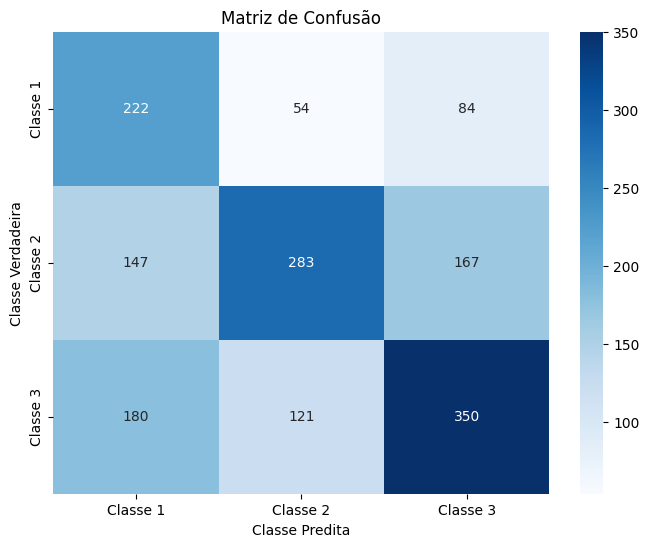

In [77]:
# Gerar a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred_classes)

# Definir as classes
classes = ['Classe 1', 'Classe 2', 'Classe 3']

# Plotar a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

In [57]:
with open('model.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)
with open('model.pkl', 'rb') as arquivo:
    modelo_model = pickle.load(arquivo)

# Modelo Random Forest - sem gridsearch


### Carregando os dados
Os dados s√£o carregados e qualquer linha contendo valores ausentes √© removida do DataFrame df_word2vec.

In [79]:
# Carregar os dados
df_word2vec = df_word2vec.dropna()

### Separando as features e o target
O target √© atribu√≠do √† vari√°vel target, que cont√©m a coluna 'sentimentoNumerico'. <br>As features s√£o atribu√≠das √† vari√°vel features, que cont√©m todas as colunas a partir da coluna 2 at√© a coluna 102

In [80]:
# Separar as features e o target
target = df_word2vec['sentimentoNumerico']
features = df_word2vec.iloc[:, 2:102]

### Dividindo os dados em treinamento e teste
Os dados s√£o divididos em conjuntos de treinamento e teste utilizando a fun√ß√£o train_test_split do scikit-learn.

In [81]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Construindo o modelo Random Forest
O modelo Random Forest √© constru√≠do utilizando a classe RandomForestClassifier do scikit-learn. √â definido o n√∫mero de estimadores como 100 e o par√¢metro random_state como 42.

In [82]:
# Construir o modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### Treinar o modelo
O modelo Random Forest √© treinado utilizando o conjunto de treinamento (X_train e y_train).

In [83]:
# Treinar o modelo
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Aplica√ß√£o da valida√ß√£o cruzada
Valida√ß√£o Cruzada no modelo Random Forest para avaliar o desempenho do modelo em diferentes conjuntos de treinamento e teste.

In [84]:
# Aplicar a valida√ß√£o cruzada
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)  # cv=5 indica 5 folds de valida√ß√£o cruzada

# Imprimir os scores de valida√ß√£o cruzada
print("Scores de valida√ß√£o cruzada:", cv_scores)
print("M√©dia dos scores:", np.mean(cv_scores))

Scores de valida√ß√£o cruzada: [0.57575758 0.6029526  0.59486781 0.60730949 0.58631415]
M√©dia dos scores: 0.593440325011087


### Avaliando o modelo
O modelo treinado √© avaliado utilizando o conjunto de teste (X_test). As previs√µes s√£o geradas usando o m√©todo predict e s√£o armazenadas na vari√°vel y_pred.

In [85]:
# Avaliar o modelo
y_pred = model_rf.predict(X_test)

# Gerar o relat√≥rio de classifica√ß√£o
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       360
           1       0.66      0.57      0.61       597
           2       0.62      0.70      0.65       651

    accuracy                           0.61      1608
   macro avg       0.61      0.60      0.60      1608
weighted avg       0.62      0.61      0.61      1608



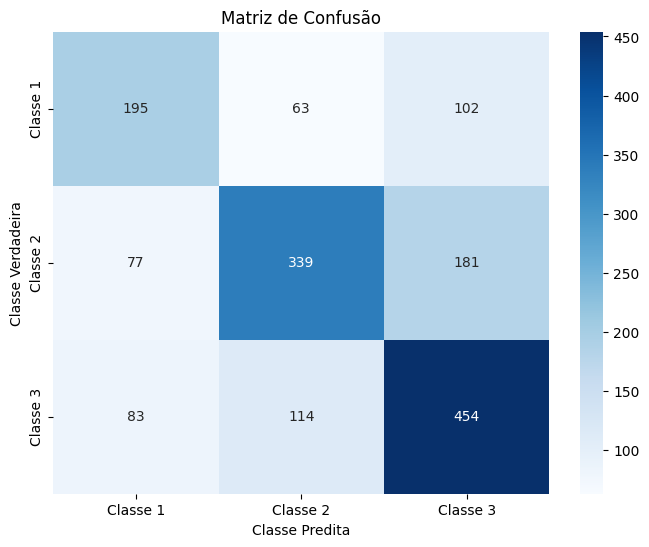

In [86]:
# Gerar a matriz de confus√£o
matriz_confusao = confusion_matrix(y_test, y_pred)

# Definir as classes
classes = ['Classe 1', 'Classe 2', 'Classe 3']

# Plotar a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

# Modelo Random Forest - com gridsearch

In [66]:
# Carregar os dados
df_word2vec = df_word2vec.dropna()

# Separar as features e o target
target = df_word2vec['sentimentoNumerico']
features = df_word2vec.iloc[:, 2:102]

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definir o modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Definir os hiperpar√¢metros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],  # N√∫mero de √°rvores na floresta
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores hiperpar√¢metros encontrados
best_params = grid_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)

# Treinar o modelo final com os melhores hiperpar√¢metros
model_rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=42)
model_rf_best.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model_rf_best.predict(X_test)

# Gerar o relat√≥rio de classifica√ß√£o
classification_report = classification_report(y_test, y_pred)
print(classification_report)

# Gerar a matriz de confus√£o
matriz_confusao2 = confusion_matrix(y_test, y_pred)

# Definir as classes
classes = ['Classe 1', 'Classe 2', 'Classe 3']

# Plotar a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao2, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

Melhores hiperpar√¢metros: {'n_estimators': 300}


TypeError: ignored

### Exporta√ß√£o com a biblioteca pickle

In [ ]:
with open('model_rf.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)
with open('model_rf.pkl', 'rb') as arquivo:
    modelo_model_rf = pickle.load(arquivo)

# Modelo Decision Tree - sem gridsearch

In [ ]:
# Carregar os dados
df_word2vec = df_word2vec.dropna()

# Separar as features e o target
target = df_word2vec['sentimentoNumerico']
features = df_word2vec.iloc[:, 2:102]

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Construir o modelo de √°rvore de decis√£o
model = DecisionTreeClassifier()

# Aplicar a valida√ß√£o cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 para 5 folds de valida√ß√£o cruzada

# Imprimir os scores de valida√ß√£o cruzada
print("Scores de valida√ß√£o cruzada:", cv_scores)
print("M√©dia dos scores:", np.mean(cv_scores))

# Treinar o modelo final
model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test)

# Gerar o relat√≥rio de classifica√ß√£o
classification_report = classification_report(y_test, y_pred)
print(classification_report)

# Gerar a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

# Definir as classes
classes = np.unique(target)

# Plotar a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

# Modelo Decision Tree - com gridsearch

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Carregar os dados
df_word2vec = df_word2vec.dropna()

# Separar as features e o target
target = df_word2vec['sentimentoNumerico']
features = df_word2vec.iloc[:, 2:102]

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definir o modelo de √°rvore de decis√£o
model_decision_tree = DecisionTreeClassifier()

# Definir os hiperpar√¢metros a serem testados
param_grid = {
    'criterion': ['gini', 'entropy'],  # Crit√©rio para medir a qualidade da divis√£o
    'max_depth': [None, 5, 10],  # Profundidade m√°xima da √°rvore
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model_decision_tree, param_grid=param_grid, cv=5)

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores hiperpar√¢metros encontrados
best_params = grid_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)

# Treinar o modelo final com os melhores hiperpar√¢metros
model_best = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
model_best.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model_best.predict(X_test)

# Gerar o relat√≥rio de classifica√ß√£o
classification_report = classification_report(y_test, y_pred)
print(classification_report)

### Exporta√ß√£o com a biblioteca pickle

In [ ]:
with open('model_decision_tree.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)
with open('model_decision_tree.pkl', 'rb') as arquivo:
    modelo_model_decision_tree = pickle.load(arquivo)